In [1]:
from embeddings.dataset.tno_dataset_collection import TnoDatasetCollection
from embeddings.dataset.emission_field_transforms import RandomSparseEmittersTransform
import matplotlib.pyplot as plt
from embeddings.common.gnfr_sector import GnfrSector
from embeddings.plotting.city_emission_field_plot import plot_emission_field

In [2]:
CITY = "Munich"

In [3]:
dataset_collection = TnoDatasetCollection()

data = dataset_collection.get_case_study_data(CITY, year=2015)
data.disable_temporal_transforms()
data.add_sampling_transform(RandomSparseEmittersTransform(lam=100))

[INFO] > Loading TNO data from '/home/must1d/Repositories/inventory-embeddings/data/TNO-GHGco-1km/TNO_by_city/TNO_GHGco_2015_highres_by_city.csv'
[INFO] > Loading TNO data from '/home/must1d/Repositories/inventory-embeddings/data/TNO-GHGco-1km/TNO_by_city/TNO_GHGco_2018_highres_by_city.csv'
[INFO] > Test Set has 13 unique cites!                          
	Győr, Szczecin, Reims, Duisburg, Gdynia, Dresden, Aachen, Siegen, Innsbruck, Großzschocher, Magdeburg, Prague, Hamburg
[INFO] > Validation Set has 15 unique cites!
	Frankfurt am Main, Ingolstadt, Koblenz, Bielefeld, Nijmegen, Southampton, Wałbrzych, Brussels, Linz, Zielona Góra, Erfurt, Bydgoszcz, Angers, Kalisz, Kassel
[INFO] > Training Set has 74 unique cites!
	Basel, Rouen, Antwerpen, Apeldoorn, Brno, Copenhagen, Dijon, Koszalin, Le Havre, Lille, Kingston upon Hull, Strasbourg, Freiburg, Augsburg, Groningen, Stuttgart, Hastings, Wrocław, Würzburg, Münster, Brugge, Ostrava, Amiens, Salzburg, Trier, Vienna, Sheffield, Nürnberg, Rosto

In [4]:
emission_field = data.get_city_emission_field(0, apply_sampling_transforms=False)
vmax = 1.1 * emission_field.co2_ff_field.max()

emission_field_transformed = data.get_city_emission_field(0, apply_sampling_transforms=True)
vmax_transformed = 1.1 * emission_field_transformed.co2_ff_field.max()

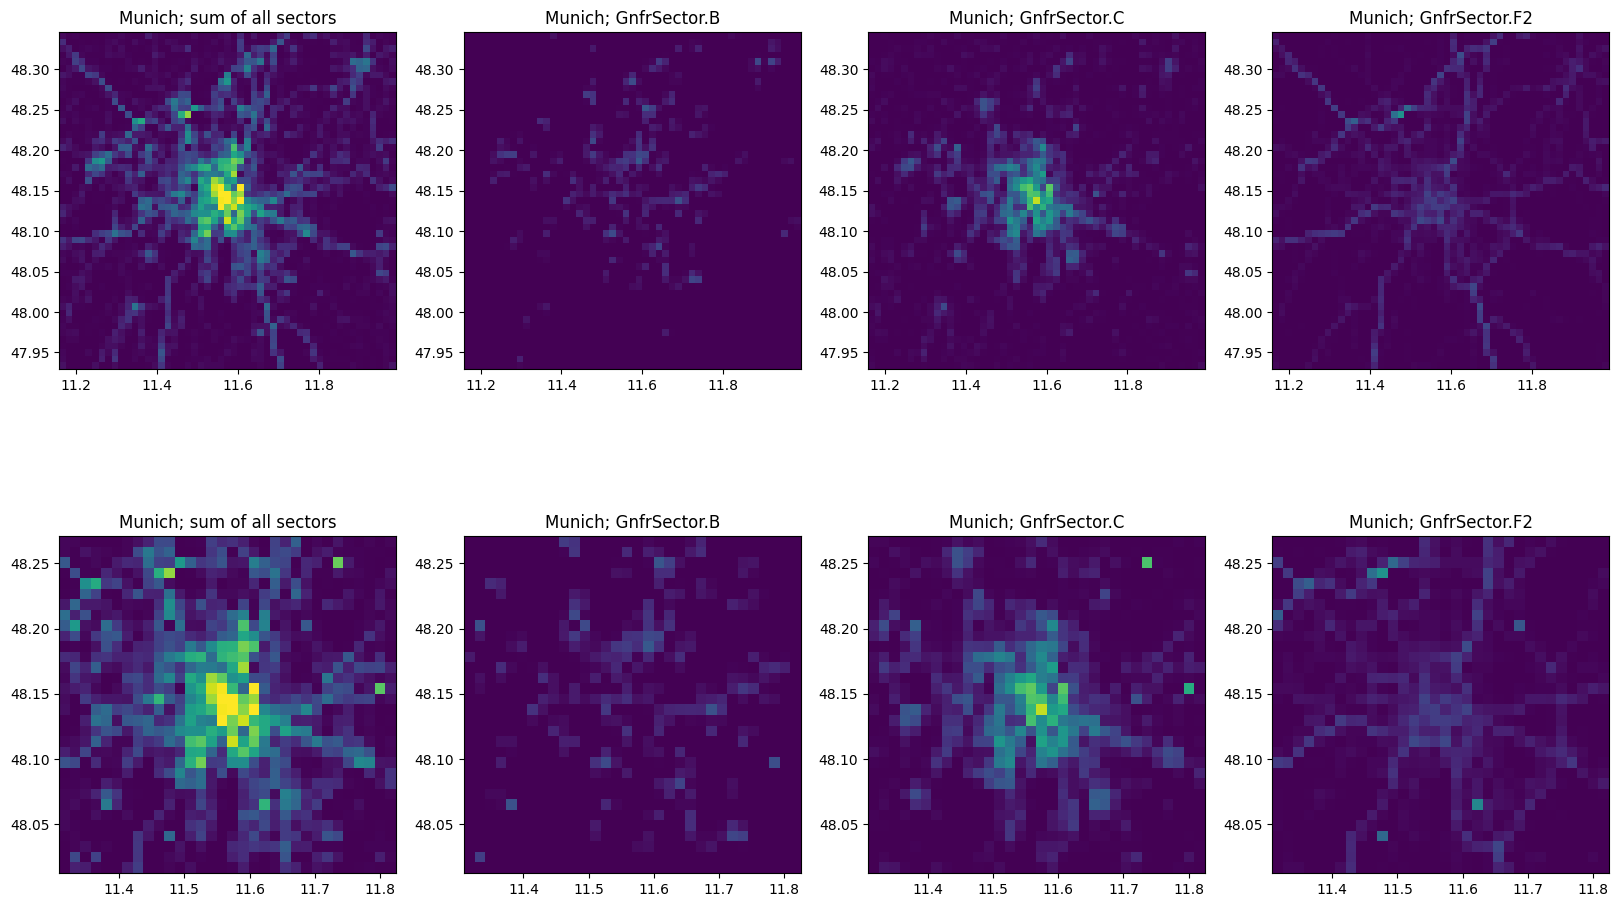

In [5]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20, 12))

plot_emission_field(emission_field=emission_field, ax=ax1, vmax=vmax)
plot_emission_field(emission_field=emission_field, ax=ax2, sector=GnfrSector.B, vmax=vmax)
plot_emission_field(emission_field=emission_field, ax=ax3, sector=GnfrSector.C, vmax=vmax)
plot_emission_field(emission_field=emission_field, ax=ax4, sector=GnfrSector.F2, vmax=vmax)

plot_emission_field(emission_field=emission_field_transformed, ax=ax5, vmax=vmax)
plot_emission_field(emission_field=emission_field_transformed, ax=ax6, sector=GnfrSector.B, vmax=vmax)
plot_emission_field(emission_field=emission_field_transformed, ax=ax7, sector=GnfrSector.C, vmax=vmax)
plot_emission_field(emission_field=emission_field_transformed, ax=ax8, sector=GnfrSector.F2, vmax=vmax)